### Actividad Práctica 4.2: Clustering y Reducción de Dimensionalidad
Vamos a resolver la actividad paso a paso, utilizando el algoritmo de K-means para realizar el agrupamiento (clustering) y el PCA (Análisis de Componentes Principales) para reducir la dimensionalidad.
- Objetivo:
Clustering (Agrupamiento): Utilizar K-means para identificar patrones en los datos.
- Reducción de Dimensionalidad: Utilizar PCA para reducir el número de características manteniendo la mayor cantidad de información posible.


#### Paso 1: Selección del conjunto de datos
En este caso, utilizaremos un conjunto de datos de características de clientes, como por ejemplo, edad, ingresos, etc. Para simplificar, generaremos datos sintéticos representando dos características (edad e ingresos).


#### Paso 2: Generación de datos sintéticos
Primero, vamos a generar datos de clientes con dos características:
- Edad (en años)
- Ingresos (en miles de dólares anuales)


In [1]:
'''Primero, vamos a generar datos de clientes con dos características:
- Edad (en años)
- Ingresos (en miles de dólares anuales)
Hemos creado un conjunto de datos con 500 clientes, con edades entre 18 y 70 años, e ingresos entre 20,000 y 150,000 dólares.'''
import numpy as np     # Importamos numpy como np para poder usarlo en el código, numpy es una librería de Python que nos permite trabajar con vectores y matrices de manera eficiente.
import pandas as pd    # Importamos pandas como pd para poder usarlo en el código, pandas es una librería de Python que nos permite trabajar con estructuras de datos de manera eficiente.
import matplotlib.pyplot as plt  # Importamos matplotlib.pyplot como plt para poder usarlo en el código, matplotlib es una librería de Python que nos permite hacer gráficos de manera eficiente.
from sklearn.cluster import KMeans  # Importamos KMeans de sklearn.cluster para poder usarlo en el código, KMeans es un algoritmo de clustering que nos permite agrupar datos de manera eficiente.
from sklearn.preprocessing import StandardScaler  # Importamos StandardScaler de sklearn.preprocessing para poder usarlo en el código, StandardScaler es una clase que nos permite estandarizar los datos de manera eficiente.
from sklearn.metrics import silhouette_score  # Importamos silhouette_score de sklearn.metrics para poder usarlo en el código, silhouette_score es una métrica que nos permite evaluar la calidad de un clustering de manera eficiente.
from sklearn.metrics import calinski_harabasz_score  # Importamos calinski_harabasz_score de sklearn.metrics para poder usarlo en el código, calinski_harabasz_score es una métrica que nos permite evaluar la calidad de un clustering de manera eficiente.

np.random.seed(0)  # Fijamos la semilla para que los resultados sean reproducibles
n_clients = 500  # Número de clientes
age = np.random.randint(18, 70, n_clients)  # Edades de los clientes
income = np.random.randint(20, 150, n_clients) * 1000 # Ingresos de los clientes
data = pd.DataFrame({'age': age, 'income': income})  # Creamos un DataFrame con las edades y los ingresos de los clientes
data.head()

,age,income
0,62,103000
1,65,96000
2,18,38000
3,21,133000
4,21,94000


- Explicación:

Hemos creado un conjunto de datos con 500 clientes, con edades entre 18 y 70 años, e ingresos entre 20,000 y 150,000 dólares.


#### Paso 3: Aplicación de K-means para Clustering
Ahora aplicaremos el algoritmo K-means para realizar el agrupamiento de clientes. Elegiremos un número de grupos K=3, que es una elección arbitraria para comenzar.

c:\Users\Javier\anaconda3\envs\python\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Javier\anaconda3\envs\python\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Javier\anaconda3\envs\python\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Javier\anaconda3\envs\python\Lib\subprocess.py", line 1028, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Javier\anaconda3\envs\python\Lib\subprocess.py", line

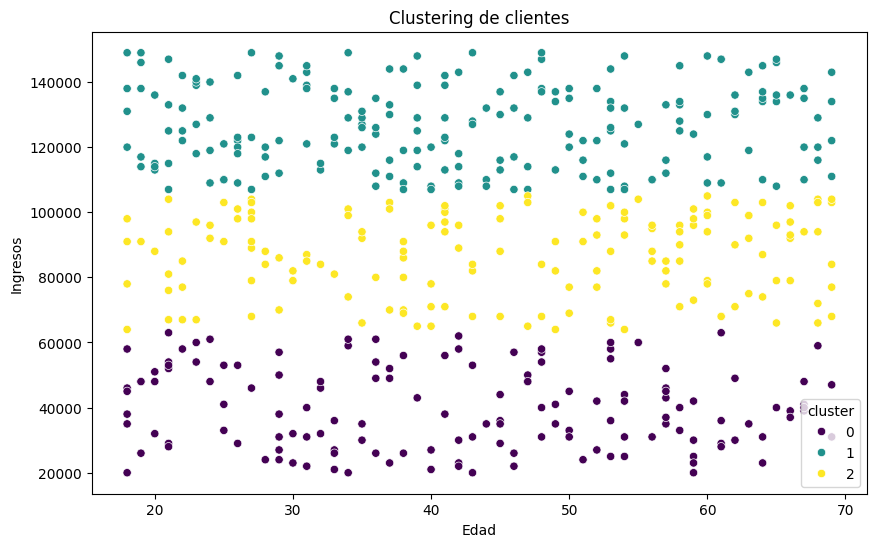

In [2]:
'''Aplicación de K-means para Clustering
Ahora aplicaremos el algoritmo K-means para realizar el agrupamiento de clientes. Elegiremos un número de grupos K=3, que es una elección arbitraria para comenzar.
- KMeans(n_clusters=3):
- fit_predict():
- Visualización:'''
import seaborn as sns  # Importamos seaborn como sns para poder usarlo en el código, seaborn es una librería de Python que nos permite hacer gráficos de manera eficiente.
kmeans = KMeans(n_clusters=3)  # Creamos un objeto KMeans con 3 grupos
data['cluster'] = kmeans.fit_predict(data)  # Aplicamos el algoritmo K-means a los datos
plt.figure(figsize=(10, 6))  # Creamos una figura de tamaño 10x6
sns.scatterplot(x='age', y='income', hue='cluster', data=data, palette='viridis')  # Hacemos un gráfico de dispersión de edad vs ingresos, coloreando los puntos por cluster
plt.title('Clustering de clientes')  # Ponemos un título al gráfico
plt.xlabel('Edad')  # Ponemos una etiqueta en el eje x
plt.ylabel('Ingresos')  # Ponemos una etiqueta en el eje y
plt.show()  # Mostramos el gráfico

Explicación:

- KMeans(n_clusters=3):
- fit_predict():
- Visualización:


#### Paso 4: Reducción de Dimensionalidad con PCA
Ahora vamos a reducir la dimensionalidad de los datos utilizando el Análisis de Componentes Principales (PCA). Esto es útil cuando tenemos más de dos características y queremos visualizar los datos en dos dimensiones.


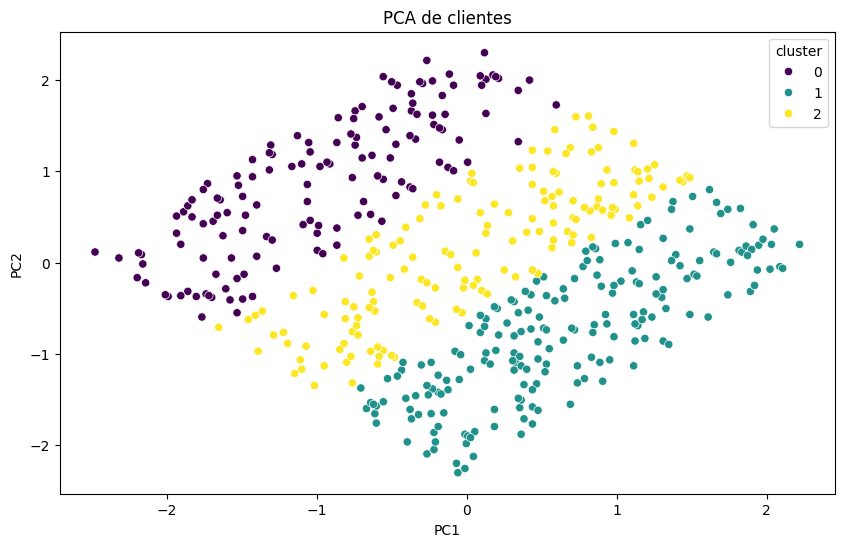

In [4]:
'''Reducción de Dimensionalidad con PCA
Ahora vamos a reducir la dimensionalidad de los datos utilizando el Análisis de Componentes Principales (PCA). Esto es útil cuando tenemos más de dos características y queremos visualizar los datos en dos dimensiones.
- PCA(n_components=2):
- fit_transform():
- Visualización:'''
from sklearn.decomposition import PCA  # Importamos PCA de sklearn.decomposition para poder usarlo en el código, PCA es una técnica de reducción de dimensionalidad que nos permite visualizar los datos en dos dimensiones.
# Estandarizar los datos
scaler = StandardScaler()  # Creamos un objeto StandardScaler
data_scaled = scaler.fit_transform(data[['age', 'income']])  # Estandarizamos las edades y los ingresos de los clientes utilizando scaler.fit_transform que ajusta el escalador y transforma los datos

# Aplicar PCA para reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)   # Creamos un objeto PCA con 2 componentes principales
data_pca = pca.fit_transform(data_scaled)  # Aplicamos PCA a los datos estandarizados

# Crear un DataFrame con los componentes principales
data_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])  # Creamos un DataFrame con los componentes principales
data_pca['cluster'] = data['cluster'].values  # Añadimos la columna cluster al DataFrame

# Visualizar los componentes principales coloreados por cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=data_pca, palette='viridis')  # Hacemos un gráfico de dispersión de PC1 vs PC2, coloreando los puntos por cluster
plt.title('PCA de clientes')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
    
    
    
    
    






Explicación:

- PCA(n_components=2):
- fit_transform():
- Visualización:

#### Paso 5: Comparación antes y después de la reducción de dimensionalidad
Comparamos los resultados de clustering antes y después de aplicar PCA.

- Clustering sin PCA (en 2 dimensiones originales):

En el gráfico de dispersión anterior, los clusters están basados en las características de edad e ingresos.

- Clustering con PCA:

En el gráfico después de PCA, los puntos se proyectan sobre las 2 componentes principales, pero los clusters siguen siendo los mismos, ya que el algoritmo de K-means no cambia.


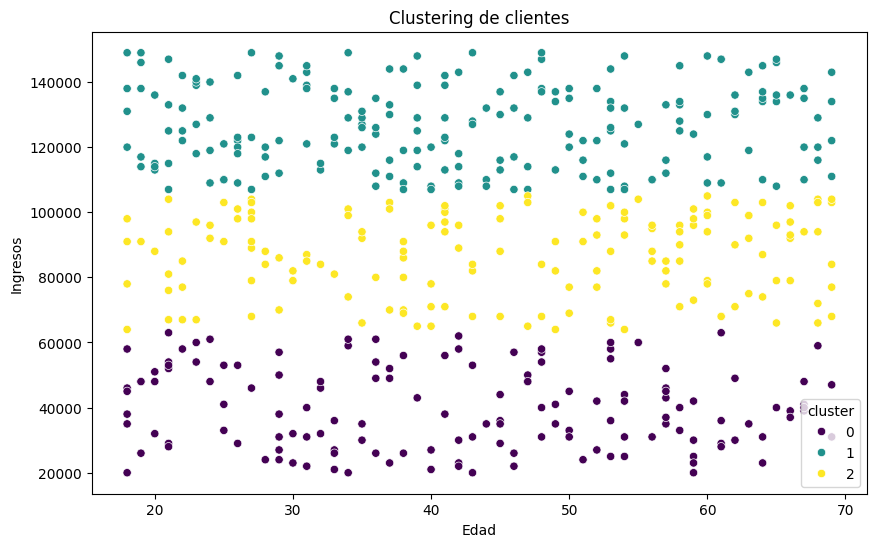

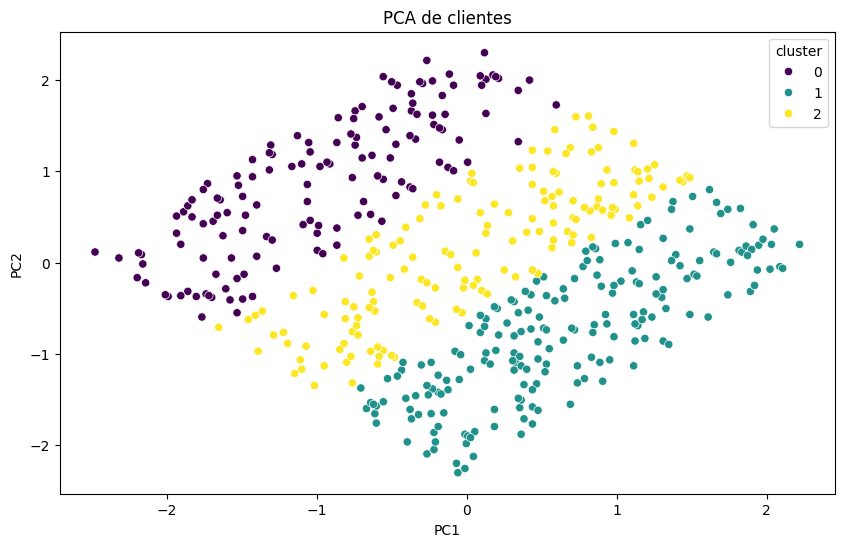

'En el gráfico de dispersión anterior, los clusters están basados en las características de edad e ingresos. Sin embargo, después de aplicar PCA, los clusters están basados en las componentes principales, que son combinaciones lineales de las características originales. A pesar de que los clusters pueden parecer diferentes, la estructura subyacente de los datos es la misma.'

In [9]:
'''Comparamos los resultados de clustering antes y después de aplicar PCA.

- Clustering sin PCA (en 2 dimensiones originales):'''
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='income', hue='cluster', data=data, palette='viridis')  # Hacemos un gráfico de dispersión de edad vs ingresos, coloreando los puntos por cluster
plt.title('Clustering de clientes')
plt.xlabel('Edad')
plt.ylabel('Ingresos')
plt.show()

'''- Clustering con PCA (en 2 componentes principales):'''
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=data_pca, palette='viridis')  # Hacemos un gráfico de dispersión de PC1 vs PC2, coloreando los puntos por cluster
plt.title('PCA de clientes')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

'''En el gráfico de dispersión anterior, los clusters están basados en las características de edad e ingresos. Sin embargo, después de aplicar PCA, los clusters están basados en las componentes principales, que son combinaciones lineales de las características originales. A pesar de que los clusters pueden parecer diferentes, la estructura subyacente de los datos es la misma.'''

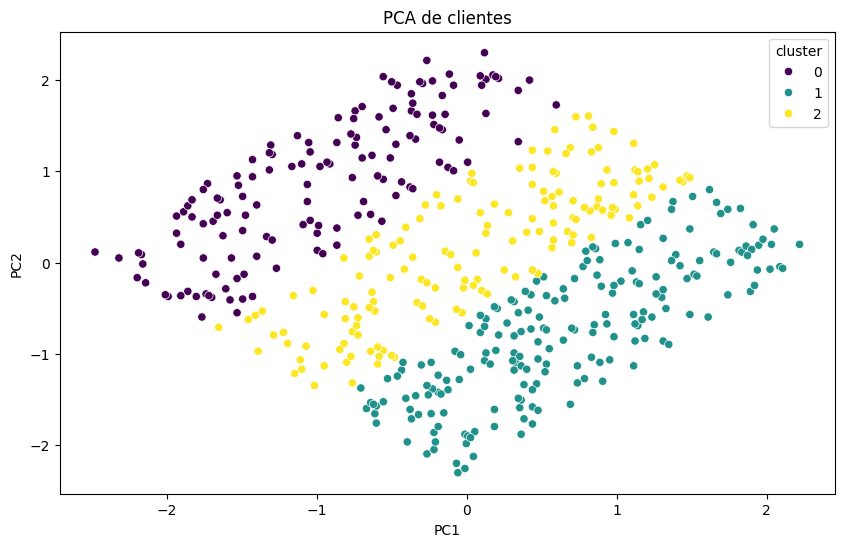

'En el gráfico después de PCA, los puntos se proyectan sobre las 2 componentes principales, pero los clusters siguen siendo los mismos, ya que el algoritmo de K-means no cambia.'

In [8]:
'''En el gráfico de dispersión anterior, los clusters están basados en las características de edad e ingresos.

- Clustering con PCA:'''
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=data_pca, palette='viridis')  # Hacemos un gráfico de dispersión de PC1 vs PC2, coloreando los puntos por cluster
plt.title('PCA de clientes')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

'''En el gráfico después de PCA, los puntos se proyectan sobre las 2 componentes principales, pero los clusters siguen siendo los mismos, ya que el algoritmo de K-means no cambia.'''

#### Paso 6: Explicación de los Resultados

- Antes de PCA:

El clustering de K-means agrupó a los clientes en 3 clusters según sus características originales. Se puede ver que hay una cierta separación entre los grupos, especialmente entre los clientes jóvenes y mayores, o los que tienen altos o bajos ingresos.


- Después de PCA:

Al reducir la dimensionalidad, logramos representar los mismos datos en un espacio bidimensional, pero los clusters siguen siendo los mismos. Esto muestra que la reducción de dimensionalidad mantuvo la estructura del agrupamiento.
